## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
m_df = pd.merge(study_results, mouse_metadata,  on="Mouse ID")
m_df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = m_df['Mouse ID'].unique()
num_mice.size

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = m_df[m_df.duplicated(['Mouse ID', 'Timepoint'])]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
m_df = m_df[m_df['Mouse ID'] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = m_df['Mouse ID'].unique()
num_mice.size

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# first rename the tumor column
m_df = m_df.rename(columns={"Tumor Volume (mm3)": "TumorVolume"})

summary_stats = m_df.groupby(['Drug Regimen'])

# Getting all of the individual metrics
tv_mean = summary_stats["TumorVolume"].mean()
tv_median = summary_stats["TumorVolume"].median()
tv_variance = summary_stats["TumorVolume"].var()
tv_stdev = summary_stats["TumorVolume"].std()
tv_sem = summary_stats["TumorVolume"].sem()

sum_stats = pd.DataFrame({"Mean": tv_mean,
                          "Median": tv_median,
                          "Variance": tv_variance,
                          "Std Dev": tv_stdev,
                          "SEM": tv_sem})
sum_stats




,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

ss_df = m_df.groupby(m_df["Drug Regimen"]).TumorVolume.agg(["mean", "median", "var", "std", "sem"])

ss_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Time Points')

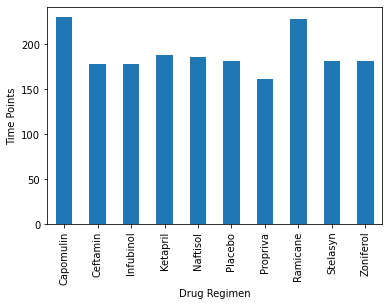

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
tot_meas = m_df.groupby(m_df["Drug Regimen"]).Timepoint.count()
tot_meas.plot.bar(x="Drug Regimen", y='Timepoint.count()')
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")

## Bar and Pie Charts

<BarContainer object of 10 artists>

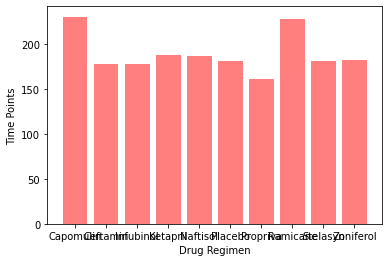

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

tom = m_df.groupby(m_df["Drug Regimen"]).Timepoint.count().reset_index()
x_axis= tom['Drug Regimen']
y_axis= tom['Timepoint']
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

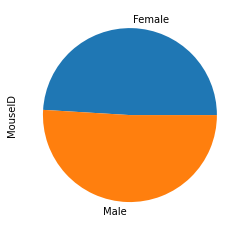

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#tot_meas = m_df.groupby(m_df["Drug Regimen"]).Timepoint.count()
#tot_meas.plot.bar(x="Drug Regimen", y='Timepoint.count()')
m_df = m_df.rename(columns={"Mouse ID": "MouseID"})
gender_df = m_df.groupby(m_df["Sex"]).MouseID.count()
gender_df.plot.pie(y="Sex.count()")
#gender_df.head()

([<matplotlib.patches.Wedge at 0x7fca71a88ee0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

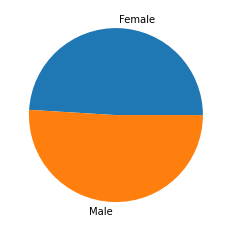

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


sex_df = m_df.groupby(m_df["Sex"]).MouseID.count().reset_index()
#x_axis= sex_df['Sex']
#y_axis= sex_df['MouseID']

plt.pie(
    sex_df['MouseID'],
    labels=sex_df['Sex']
)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treat_df = m_df[m_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#treat_df
max_tp = treat_df.groupby(treat_df['MouseID']).Timepoint.max().reset_index()
#max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_results = study_results.rename(columns={"Mouse ID": "MouseID"})
max_tv = pd.merge(study_results,max_tp,   on=["MouseID", "Timepoint"])
#max_tv
mouse_metadata = mouse_metadata.rename(columns={"Mouse ID": "MouseID"})
all_max_tv = pd.merge(max_tv, mouse_metadata,  on=["MouseID"])
all_max_tv



,MouseID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


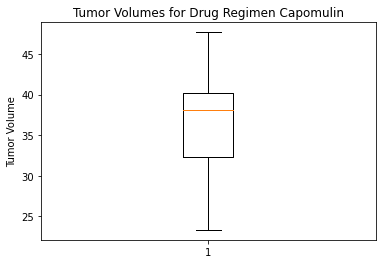

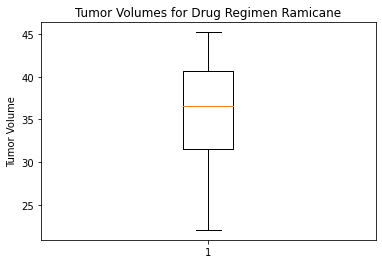

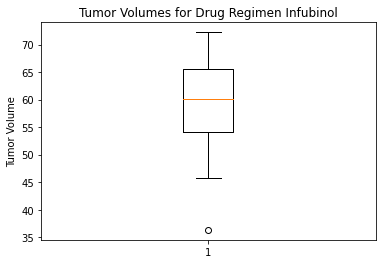

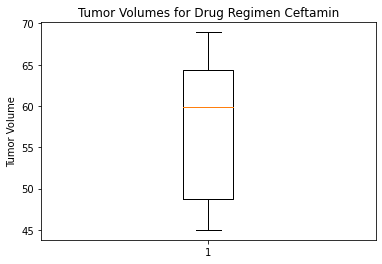

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,MouseID,Timepoint,TumorVolume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [14]:
all_max_tv = all_max_tv.rename(columns={"Tumor Volume (mm3)": "TumorVolume"})
#use a copy of the all_max_df
tv_top4 = all_max_tv.copy()

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatment_list:
    capo_tv = tv_top4.loc[(tv_top4['Drug Regimen'] == treatment), ['TumorVolume']]
    tv_list = capo_tv['TumorVolume'].tolist()

    # plot info
    fig1, ax1 = plt.subplots()
    ax1.set_title(f'Tumor Volumes for Drug Regimen {treatment}')
    ax1.set_ylabel('Tumor Volume')
    ax1.boxplot(tv_list)
    plt.show()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []



# Calculate the IQR and quantitatively determine if there are any potential outliers. 


tumor_volume = all_max_tv['TumorVolume']
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
outlier_tumor_volume = all_max_tv.loc[(all_max_tv['TumorVolume'] < lower_bound) | (all_max_tv['TumorVolume'] > upper_bound)]
outlier_tumor_volume

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

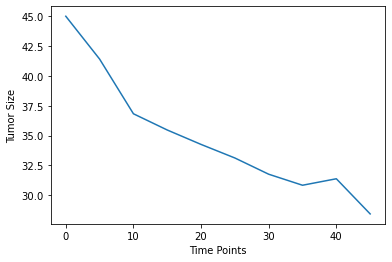

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# m601 MouseID
m601_data = m_df[m_df['MouseID'] == 'm601']
m601_data
m601_x = m601_data['Timepoint']
m601_y = m601_data['TumorVolume']

plt.xlabel("Time Points")
plt.ylabel("Tumor Size")

plt.plot(m601_x, m601_y)
# Show the graph that we have created
plt.show()

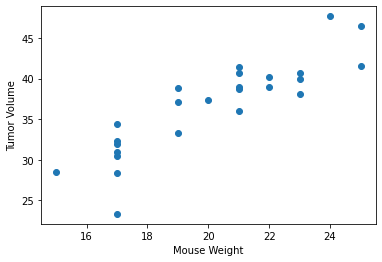

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_data = all_max_tv[all_max_tv['Drug Regimen'] == 'Capomulin']
x_axis = capo_data['Weight (g)']
y_axis = capo_data['TumorVolume']

plt.scatter(x_axis, y_axis)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_data = capo_data.reset_index()
capo_data

,index,MouseID,Timepoint,TumorVolume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,11,w150,10,39.952347,0,Capomulin,Male,23,23
1,14,r157,15,46.539206,0,Capomulin,Male,22,25
2,16,f966,20,30.485985,0,Capomulin,Male,16,17
3,33,j246,35,38.753265,1,Capomulin,Female,21,21
4,38,b128,45,38.982878,2,Capomulin,Female,9,22
5,42,t565,45,34.455298,0,Capomulin,Female,20,17
6,43,l509,45,41.483008,3,Capomulin,Male,17,21
7,47,g288,45,37.074024,1,Capomulin,Male,3,19
8,53,r554,45,32.377357,3,Capomulin,Female,8,17
9,56,g316,45,40.159220,2,Capomulin,Female,22,22


The correlation between both factors is 0.88


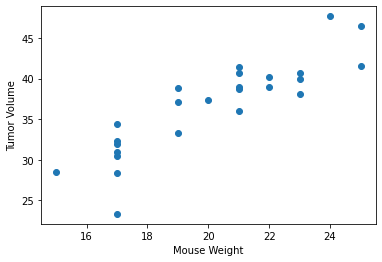

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = capo_data.iloc[:,8]
tumor_volume = capo_data.iloc[:,3]
correlation = st.pearsonr(mouse_weight,tumor_volume)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

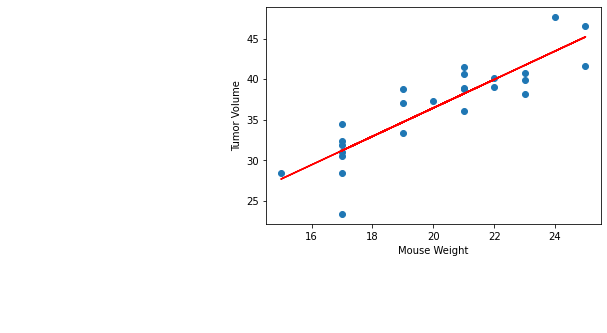

In [23]:
# Add the linear regression equation and line to plot
x_values = capo_data.iloc[:,8]
y_values = capo_data.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()
